<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

`Ваш ответ здесь`



## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [280]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [120]:
# Функция и её производная
def f(x):
    return x * np.sin(5 * x) + 0.1 * x**2

def df(x):
    return np.sin(5 * x) + 5 * x * np.cos(5 * x) + 0.2 * x

# Градиентный спуск c поиском минимума
def gradient_descent_min(f, df, x0, eta, max_iter=1000, tol=1e-6):
    x = x0
    path = []
    path.append(x)
    for i in range(max_iter):
        grad = df(x)
        x = x - eta * grad
        path.append(x)
        if np.abs(grad) < tol:
            break
    return x, path

# Градиентный спуск c поиском максимума
def gradient_descent_max(f, df, x0, eta, max_iter=1000, tol=1e-6):
    x = x0
    path = []
    path.append(x)
    for i in range(max_iter):
        grad = df(x)
        x = x + eta * grad
        path.append(x)
        if np.abs(grad) < tol:
            break
    return x, path

# Поиск экстремумов
def find_points(f, df, x0, eta, max_iter=1000, tol=1e-6):
    min_x, min_path = gradient_descent_min(f, df, x0, eta, max_iter, tol)
    max_x, max_path = gradient_descent_max(f, df, x0, eta, max_iter, tol)
    return min_x, max_x, min_path, max_path

for x0 in [1, 0.5, 0]:
    min_x, max_x, min_path, max_path = find_points(f, df, x0, 0.001)
    print('-'*70)
    print(f'x = {x0}\t| max = {np.round(max_x,3)}\t  f(x) = {np.round(f(max_x),3)}\t| min = {np.round(min_x,3)}\tf(x) = {np.round(f(min_x),3)}')
    print('-'*70)

----------------------------------------------------------------------
x = 1	| max = 1.604	  f(x) = 1.839	| min = 0.975	f(x) = -0.867
----------------------------------------------------------------------
----------------------------------------------------------------------
x = 0.5	| max = 0.412	  f(x) = 0.381	| min = 0.975	f(x) = -0.867
----------------------------------------------------------------------
----------------------------------------------------------------------
x = 0	| max = 0.0	  f(x) = 0.0	| min = 0.0	f(x) = 0.0
----------------------------------------------------------------------


## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [153]:
def ols_solution(X, y):
    ''' w = (X^T * X)^(-1) * X^T * y '''

    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [295]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

def stochastic_gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    m = X.shape[0]
    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        random_index = np.random.randint(low=0, high=len(X)-1)        
        X_i = X[random_index, :].reshape(1, -1)
        y_i = y[random_index]
        gradient = (2 / m) * (X_i.T.dot(((X_i.dot(params)) - y_i)))
        params = params - learning_rate * gradient
        cost_track[i] = compute_cost(X, y, params)
        
    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [212]:
def predict(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ w

def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [246]:
X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

learning_rate = 0.01
iterations=10000

CPU times: user 48.7 s, sys: 6.39 s, total: 55.1 s
Wall time: 15.4 s


0.7554626185750483

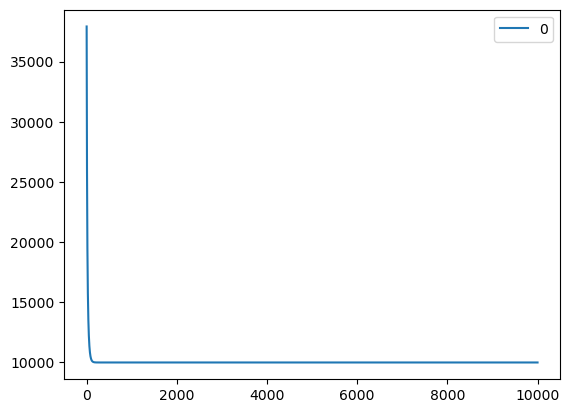

In [286]:
%%time
track_grad, w_grad = gradient_descent(X, y, 0.01, 10000)
sns.lineplot(data=track_grad)
r2_score(y, predict(X, w_grad))

CPU times: user 22.5 s, sys: 3 s, total: 25.5 s
Wall time: 6.58 s


0.014863921098114186

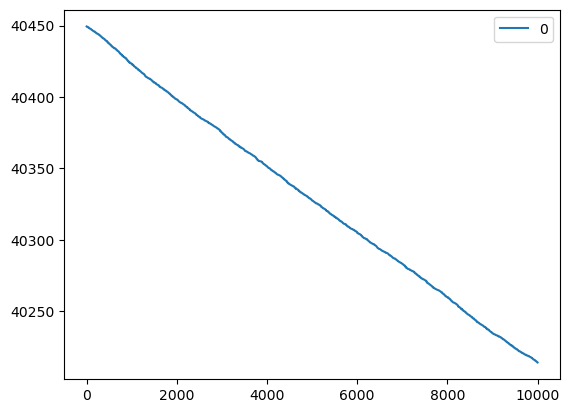

In [287]:
%%time
cost_track_sgd, params_sgd = stochastic_gradient_descent(X, y, learning_rate, iterations)
sns.lineplot(data=cost_track_sgd)
r2_score(y, predict(X, params_sgd))

In [269]:
os = ols_solution(X=X, y=y)
r2_score(y, prediction(X=X, w=os))

0.7547725341340813

По аналитической формуле наблюдалась проблема - Singular matrix. 
Связано с np.linalg.inv. попадалась каждый когда матрица была одинаковой на вход этого метода.
Получилось побороть обновлением данных и жестким прописыванием параметров на вход.

Быстрее всех отработала ols_solution, а дольше всех градиентный спуск.

Лучшее качество у градиентного спуска.

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [299]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

def stochastic_gradient_descent_r2(X, y, learning_rate, iterations, regul):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    m = X.shape[0]
    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        random_index = np.random.randint(low=0, high=len(X)-1)        
        X_i = X[random_index, :].reshape(1, -1)
        y_i = y[random_index]
        gradient = (2 / m) * (X_i.T.dot(((X_i.dot(params)) - y_i))) + (2 * regul * params)
        params = params - learning_rate * gradient
        cost_track[i] = compute_cost(X, y, params)
        
    return cost_track, params

In [315]:
for reg in np.arange(0.1, 1.1, 0.1):
    cost_track_sgd, params_sgd = stochastic_gradient_descent_r2(X, y, learning_rate, iterations, reg)    
    print(f'R2={r2_score(y, predict(X, params_sgd))} при значении {reg}')

R2=0.000275854646853424 при значении 0.1
R2=0.00015278313972177937 при значении 0.2
R2=0.00010115339110050581 при значении 0.30000000000000004
R2=5.7264983849725226e-05 при значении 0.4
R2=6.570196964850172e-05 при значении 0.5
R2=3.862344679728125e-05 при значении 0.6
R2=4.2942517618715925e-05 при значении 0.7000000000000001
R2=3.200713644158082e-05 при значении 0.8
R2=2.8029524339112655e-05 при значении 0.9
R2=1.4382534753831777e-05 при значении 1.0


Изнчально метод показывал худшие R2. при первом значении (0.1) получилось увидеть лучший результат из всего цикла.

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [322]:
import numpy as np
import random

def compute_cost(X, y, params):
    m = len(y)
    predictions = X @ params
    cost = (1 / m) * np.sum((predictions - y) ** 2)
    return cost

def gsAdaGrad(X, targets, learning_rate, num_iterations, epsilon=1e-8):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    grad = np.zeros_like(params)
    cost_history = np.zeros((num_iterations, 1))
    
    for iteration in range(num_iterations):
        ind = random.randint(0, len(X) - 1)
        feature_sample = X[ind]
        pred_error = np.dot(feature_sample, params) - targets[ind]
        grad = grad +  (2 * feature_sample.T * pred_error) ** 2
        params -= (learning_rate * (2 * feature_sample.T * pred_error)) / (np.sqrt(grad) + epsilon)
        cost_history[iteration] = compute_cost(X, targets, params)
    
    return cost_history, params

## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

`Ответ:`

Думаю в первую очередь все зависит от потребностей бизнеса.
Как правило легкие, быстрые и простые решения ценятся значительно выше. Метод Ньютона имеет сложную вычислительную сложность, а при больших количествах параметров и значительно медленную скорость выполнения.

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)

Думаю это кот Елены Кантонистовой.